# Question 2
Gaurav Anand(213079019)
Manuraj P M (213230012)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("DataClustering.csv")
df.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


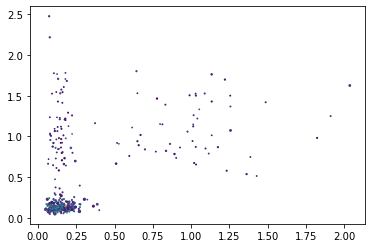

In [3]:
plt.scatter(df['x1'],df['x2'],df['x3'],df['x4'])

In [4]:
from sklearn.cluster import KMeans

In [5]:
#optimum value of k using elbow method
p=[] #list

for i in range (1,20):
      km = KMeans(n_clusters=i)
      km.fit_predict(df)
      p.append(km.inertia_)

C:\Users\GAURAV ANAND\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [6]:
p

[1431.3096155020742,
 744.626768160586,
 520.2791145774667,
 357.2400953090385,
 289.4998742111646,
 238.94781441580005,
 199.65378694399402,
 178.8141729014506,
 155.57880902206003,
 138.91908906198717,
 127.00859165297545,
 116.72900258921022,
 108.84104728207282,
 102.54108367380559,
 95.46875896319273,
 90.4194284254454,
 87.004767762123,
 81.46987799972608,
 76.40263188533113]

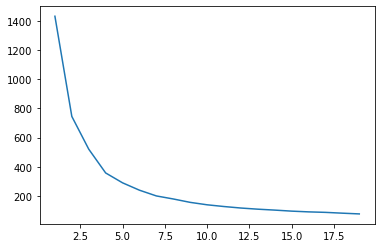

In [7]:
plt.plot(range(1,20),p)

optimum value of k turns out to be 5

In [8]:
x= df.iloc[:,[1,2]].values   #we are extracting only 1st and 2nd feature. It is because we need a 2d plot to visualize the model
km = KMeans(n_clusters=5)   
K = km.fit_predict(x)

In [9]:
K

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 0, 3, 4, 3, 3,
       0, 3, 4, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 4, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 1, 4, 4, 1, 4, 1,
       4, 1, 4, 1, 1, 4, 1, 2, 4, 4, 2, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 0,
       1, 4, 4, 1, 2, 1, 1, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

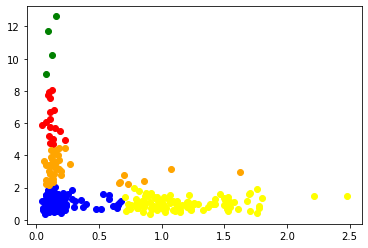

In [10]:
plt.scatter(x[K==0,0],x[K==0,1],c='blue')
plt.scatter(x[K==1,0],x[K==1,1],c='red')
plt.scatter(x[K==2,0],x[K==2,1],c='green')
plt.scatter(x[K==3,0],x[K==3,1],c='yellow')
plt.scatter(x[K==4,0],x[K==4,1],c='orange')

In [11]:
#TSNE
from sklearn.manifold import TSNE

In [12]:
m=TSNE(n_components=2,random_state=0)


In [13]:
tsne_features=m.fit_transform(df)
tsne_features[1:4,:]

array([[ 20.915224, -11.87031 ],
       [ 19.49773 , -13.961566],
       [ 19.14008 , -11.999056]], dtype=float32)

In [14]:
df['x']=tsne_features[:,0]
df['y']=tsne_features[:,1]

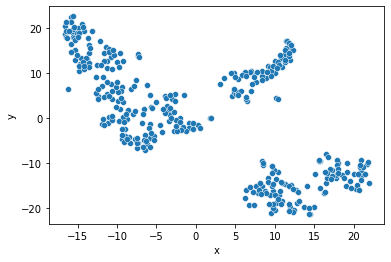

In [15]:
import seaborn as sns
sns.scatterplot(x="x",y="y",data=df)
plt.show()